# Here we make a Linear regressor model from scratch and compare it's performance with the skleran Linear Regressor

In [1]:
import numpy as np

In [2]:
X = 3 * np.random.rand(300, 1)
y = 4*X + 3 + np.random.randn(300,1) 

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [4]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train, color='blue')
plt.scatter(X_test,y_test, color='red')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
class linearReg():
    # Initializing variables
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    # Creating fitting method
    def fit(self, X, y):
        
        # Number of rows and columns in the data
        self.m, self.n = X.shape
        
        self.w = np.diag(np.ones(self.n))
        self.b = 0
        
        self.X = X
        self.y = y
        
        # Getting minimized weight using Gradient Descent
        for i in range(self.epochs):
            self.update_weights()
            
    def update_weights(self):
        
        y_pred = self.predict(self.X)
        
        # Gradients of weights
        dw = (-2/self.m) * (self.X.T).dot(self.y - y_pred)
        db = (-2/self.m) * np.sum(self.y - y_pred)
        
        # updateing the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        
        
    def predict(self, X):
        return X.dot(self.w) + self.b

In [6]:
model = linearReg(learning_rate=0.001, epochs=10000)

In [7]:
model.fit(X_train,y_train)

In [8]:
model.w[0][0], model.b

(3.9622089422547693, 3.099523314959496)

In [9]:
y_pred = model.predict(X_test)

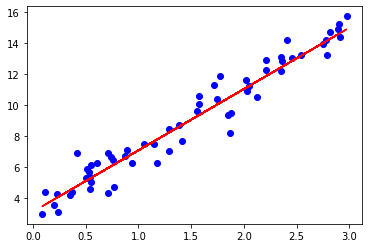

In [10]:
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_test,y_pred, color='red')
plt.show()

## Comparing with sklearn LinearRegression model

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
lr_pred = lr.predict(X_test)

In [13]:
lr.coef_, lr.intercept_

(array([[3.94789437]]), array([3.12651156]))

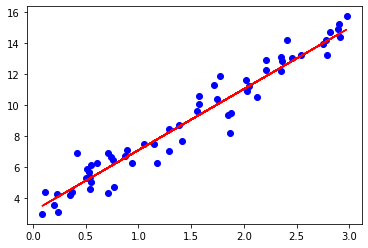

In [14]:
plt.scatter(X_test,y_test, color='blue')
plt.plot(X_test,lr_pred, color='red')
plt.show()

## Conclusion: 
* ### Our model can predict the correct weight and bias for unknown test data
* ### Our model weights and bias match with the sklearn linear regression model weights and bias


In [15]:
x1 = 2 * np.random.rand(300,1)
x2 = 4 * np.random.rand(300,1)
y = 3*x1 + 4*x2 + 2

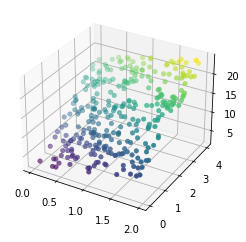

In [16]:
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, y, c=y, cmap='viridis', linewidth=0.5);

In [17]:
x = np.c_[x1,x2]
type(x)

numpy.ndarray

In [18]:
x.shape

(300, 2)

In [19]:
model2D = linearReg(learning_rate=0.001, epochs=10000)

In [20]:
model2D.fit(x, y)

In [21]:
pred = model2D.predict(x)

In [22]:
x[0]

array([1.1090287 , 3.66554287])

In [23]:
model2D.predict(x[6])

array([19.15602215, 19.15609944])

In [24]:
y[6]

array([19.15125172])

In [25]:
np.diag(np.ones(2))

array([[1., 0.],
       [0., 1.]])

In [28]:
model2D.w, model2D.b

(array([[2.9795349 , 2.97947156],
        [3.99481566, 3.99484219]]), 2.034266407717997)